In [3]:
import os
import pandas as pd 
import numpy as np 
import os
import cv2
import matplotlib.pyplot as plt
import warnings

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow as tf

import scipy
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


# Set the seed value for experiment reproduci.bility.
seed = 1842
tf.random.set_seed(seed)
np.random.seed(seed)
# Turn off warnings for cleaner looking notebook
warnings.simplefilter('ignore')


Num GPUs Available:  1


In [4]:
import pathlib
file_path = "E:/Alzheimer_s Dataset/train"
data_dir = pathlib.Path(file_path)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)


['MildDemented' 'ModerateDemented' 'NonDemented' 'VeryMildDemented']


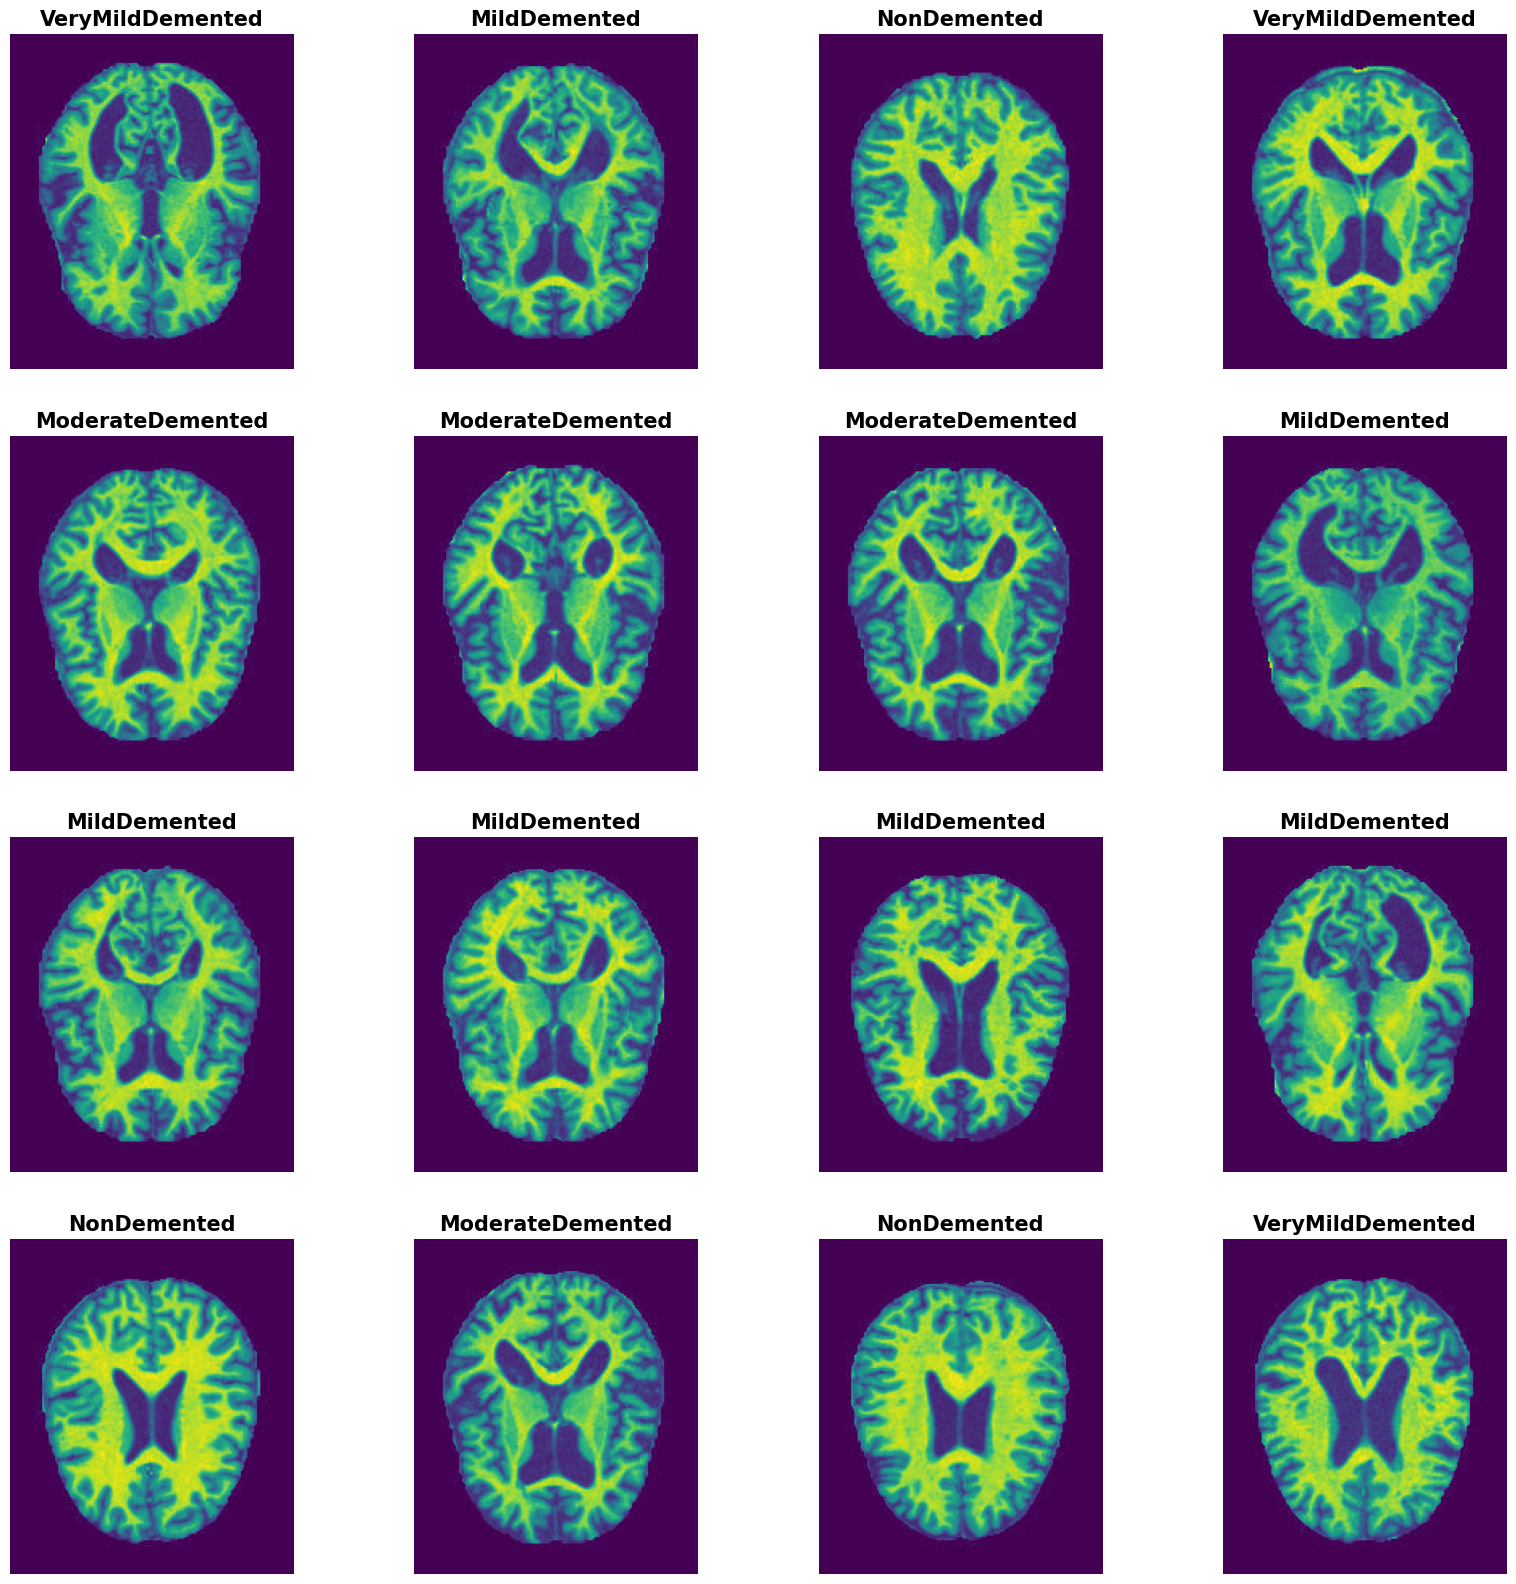

In [5]:
import random
plt.figure(figsize=(20, 20)) 
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    random_class = random.randint(0, 3)
    folder_path = file_path + '/' + class_names[random_class]
    random_image_path = folder_path + '/' + (random.sample(os.listdir(folder_path), 1)[0])
    image = plt.imread(random_image_path)
    plt.axis('off')
    plt.title(class_names[random_class], fontsize = 15, fontweight = 'bold')
    plt.imshow(image)

In [6]:
SEED = 1   # maybe can do with random seed generator and compare results with different seed values in the future.
BATCH_SIZE = 32
IMG_SIZE = (128, 128)

X_train = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed = SEED,
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    validation_split = 0.2,
    subset = 'training'
)

X_validation = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed = SEED,
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    validation_split = 0.2,
    subset = 'validation'
)


Found 6400 files belonging to 4 classes.
Using 5120 files for training.
Found 6400 files belonging to 4 classes.
Using 1280 files for validation.


In [7]:
INPUT_SHAPE = IMG_SIZE + (3,)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Rescaling(scale=1./255, input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.20))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation = 'softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1

In [175]:
history = model.fit(X_train, epochs = 20, validation_data=X_validation, verbose=1)

Epoch 1/20
160/160 [==============================] - 4s 20ms/step - loss: 0.9511 - accuracy: 0.5508 - val_loss: 0.8749 - val_accuracy: 0.5930
Epoch 2/20
160/160 [==============================] - 3s 18ms/step - loss: 0.7205 - accuracy: 0.6854 - val_loss: 0.7662 - val_accuracy: 0.6781
Epoch 3/20
160/160 [==============================] - 3s 19ms/step - loss: 0.5026 - accuracy: 0.7963 - val_loss: 0.4986 - val_accuracy: 0.7867
Epoch 4/20
160/160 [==============================] - 3s 20ms/step - loss: 0.2797 - accuracy: 0.8938 - val_loss: 0.2987 - val_accuracy: 0.8938
Epoch 5/20
160/160 [==============================] - 3s 20ms/step - loss: 0.1477 - accuracy: 0.9488 - val_loss: 0.1724 - val_accuracy: 0.9430
Epoch 6/20
160/160 [==============================] - 3s 20ms/step - loss: 0.0926 - accuracy: 0.9680 - val_loss: 0.1399 - val_accuracy: 0.9492
Epoch 7/20
160/160 [==============================] - 3s 20ms/step - loss: 0.0781 - accuracy: 0.9730 - val_loss: 0.0987 - val_accuracy: 0.9625

In [176]:
loss, accuracy = model.evaluate(X_validation)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

40/40 [==============================] - 1s 18ms/step - loss: 0.0344 - accuracy: 0.9922
Loss:  0.034371182322502136
Accuracy:  0.9921875


In [177]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Rescaling(scale=1./255, input_shape=INPUT_SHAPE))
model2.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Dropout(0.20))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(128, activation='relu'))
model2.add(tf.keras.layers.Dense(4, activation = 'softmax'))

model2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

model2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_10 (Rescaling)    (None, 128, 128, 3)       0         
                                                                 
 conv2d_31 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 32, 32, 64)      

In [178]:
history2 = model2.fit(X_train, epochs = 20, validation_data=X_validation, verbose=1)

Epoch 1/20
160/160 [==============================] - 4s 22ms/step - loss: 1.0234 - accuracy: 0.5063 - val_loss: 0.9611 - val_accuracy: 0.5398
Epoch 2/20
160/160 [==============================] - 3s 19ms/step - loss: 0.9073 - accuracy: 0.5674 - val_loss: 0.9349 - val_accuracy: 0.5172
Epoch 3/20
160/160 [==============================] - 3s 19ms/step - loss: 0.7983 - accuracy: 0.6285 - val_loss: 0.7799 - val_accuracy: 0.6500
Epoch 4/20
160/160 [==============================] - 3s 21ms/step - loss: 0.6338 - accuracy: 0.7248 - val_loss: 0.5803 - val_accuracy: 0.7484
Epoch 5/20
160/160 [==============================] - 3s 20ms/step - loss: 0.4465 - accuracy: 0.8117 - val_loss: 0.5387 - val_accuracy: 0.7797
Epoch 6/20
160/160 [==============================] - 3s 20ms/step - loss: 0.2704 - accuracy: 0.8980 - val_loss: 0.3629 - val_accuracy: 0.8578
Epoch 7/20
160/160 [==============================] - 3s 21ms/step - loss: 0.1782 - accuracy: 0.9346 - val_loss: 0.3517 - val_accuracy: 0.8703

In [179]:
loss, accuracy = model2.evaluate(X_validation)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

40/40 [==============================] - 1s 16ms/step - loss: 0.0801 - accuracy: 0.9727
Loss:  0.08010642975568771
Accuracy:  0.97265625


(<Figure size 1000x500 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <AxesSubplot:title={'center':'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

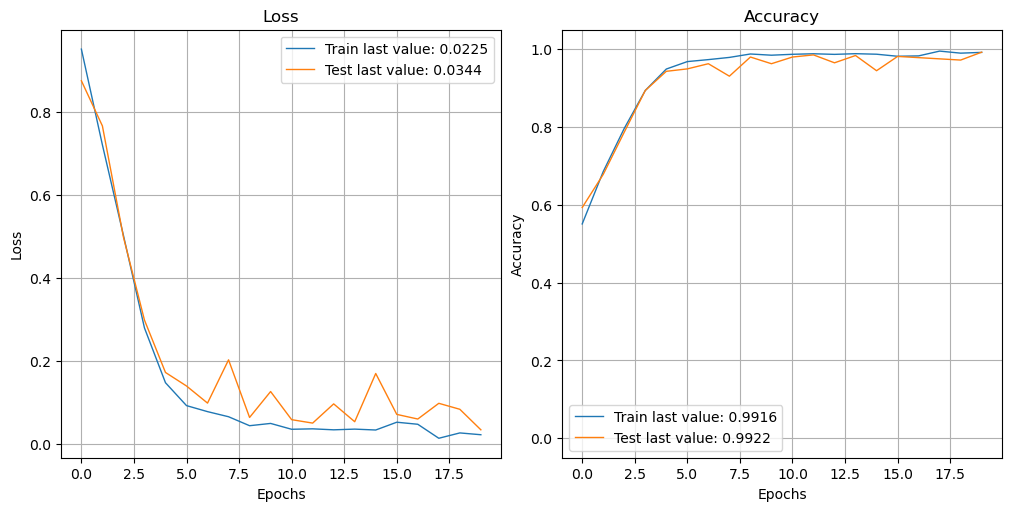

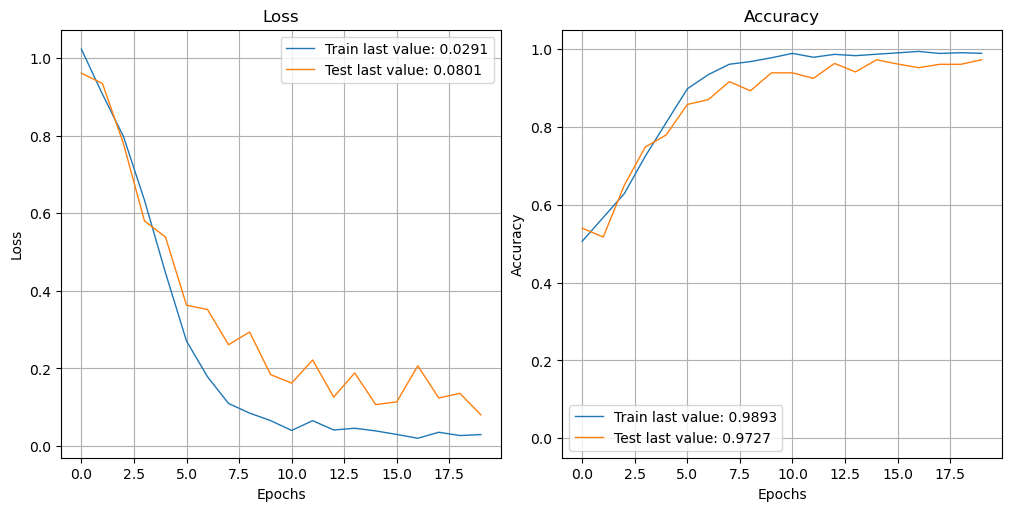

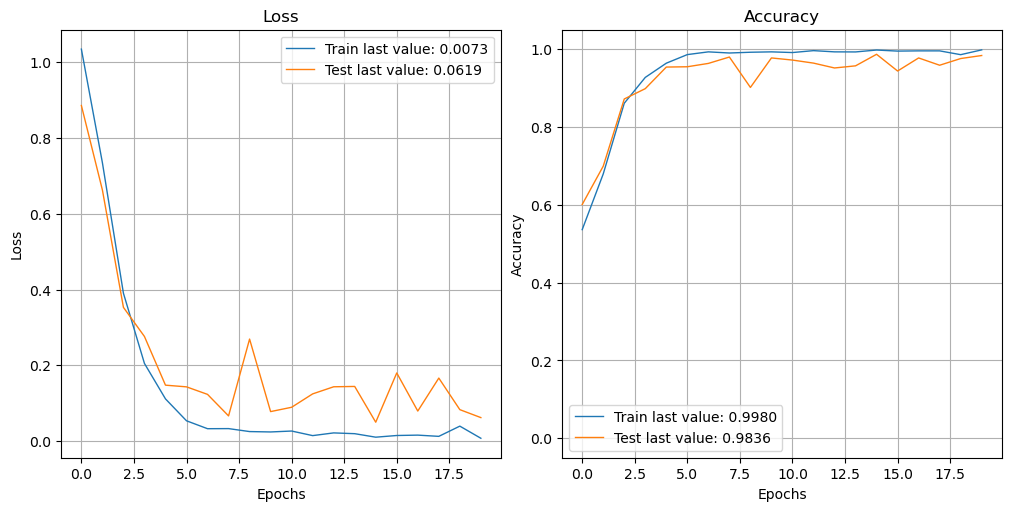

In [184]:
from plot_keras_history import show_history, plot_history
plot_history(history)
plot_history(history2)

In [199]:
filename = 'models/model_' + str(1) + '.h5'
print('>Saved %s' % filename)
model.save(filename)
filename = 'models/model_' + str(2) + '.h5'
model2.save(filename)
print('>Saved %s' % filename)

>Saved models/model_1.h5
>Saved models/model_2.h5


In [14]:
from keras.models import load_model
models = list()
filename = 'models/model_' + str(1) + '.h5'
models.append(load_model(filename))
filename = 'models/model_' + str(2) + '.h5'
models.append(load_model(filename))

In [15]:
inputs = tf.keras.layers.Input(shape=INPUT_SHAPE)
combined = tf.keras.layers.Concatenate()([models[0](inputs), models[1](inputs)])
outputs = tf.keras.layers.Dense(4)(combined)
modelEn = tf.keras.models.Model(inputs, outputs)

In [16]:
models[0].trainable = False
models[1].trainable = False
modelEn.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])
historyEn = modelEn.fit(X_train,epochs = 10, validation_data=X_validation, verbose=1)

Epoch 1/10
160/160 [==============================] - 5s 25ms/step - loss: 5.8353 - accuracy: 0.4928 - val_loss: 5.8001 - val_accuracy: 0.5055
Epoch 2/10
160/160 [==============================] - 4s 22ms/step - loss: 2.1932 - accuracy: 0.6131 - val_loss: 0.8706 - val_accuracy: 0.6148
Epoch 3/10
160/160 [==============================] - 4s 23ms/step - loss: 0.7227 - accuracy: 0.6416 - val_loss: 0.8704 - val_accuracy: 0.6141
Epoch 4/10
160/160 [==============================] - 4s 23ms/step - loss: 0.7262 - accuracy: 0.6408 - val_loss: 0.8579 - val_accuracy: 0.6148
Epoch 5/10
160/160 [==============================] - 4s 22ms/step - loss: 0.7038 - accuracy: 0.6406 - val_loss: 0.8516 - val_accuracy: 0.6148
Epoch 6/10
160/160 [==============================] - 3s 21ms/step - loss: 0.7062 - accuracy: 0.6408 - val_loss: 0.8436 - val_accuracy: 0.6148
Epoch 7/10
160/160 [==============================] - 4s 23ms/step - loss: 0.7181 - accuracy: 0.5555 - val_loss: 0.8345 - val_accuracy: 0.5016

In [13]:
model_evaluate = modelEn.evaluate(X_validation)
print("Accuracy: %", "{:.2f}".format(model_evaluate[1]*100))
print("Loss: %", "{:.2f}".format(model_evaluate[0]*100))

40/40 [==============================] - 1s 20ms/step - loss: 0.0879 - accuracy: 0.9906
Accuracy: % 99.06
Loss: % 8.79


[]

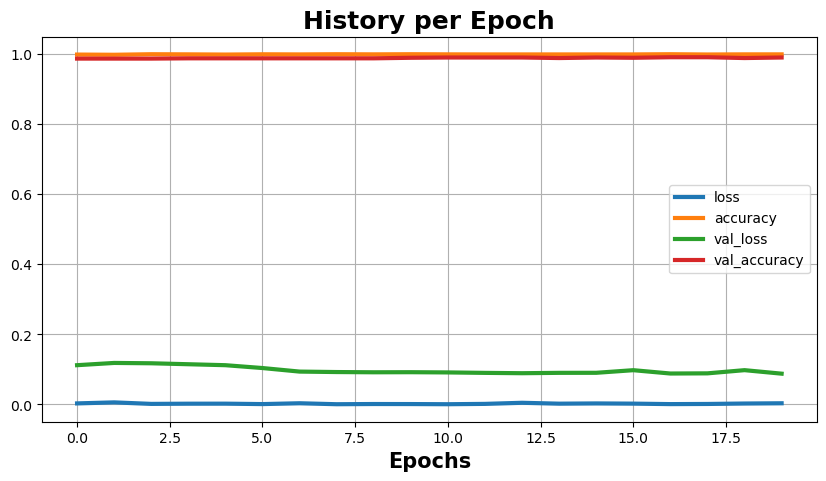

In [210]:
df = pd.DataFrame(historyEn.history)
ax = df.plot(figsize=(10,5), lw=3, grid='on')
ax.set_title('History per Epoch', fontsize=18, fontweight='bold')
ax.set_xlabel('Epochs', fontsize=15, fontweight='bold')
ax.plot()

1/1 [==============================] - 0s 25ms/step


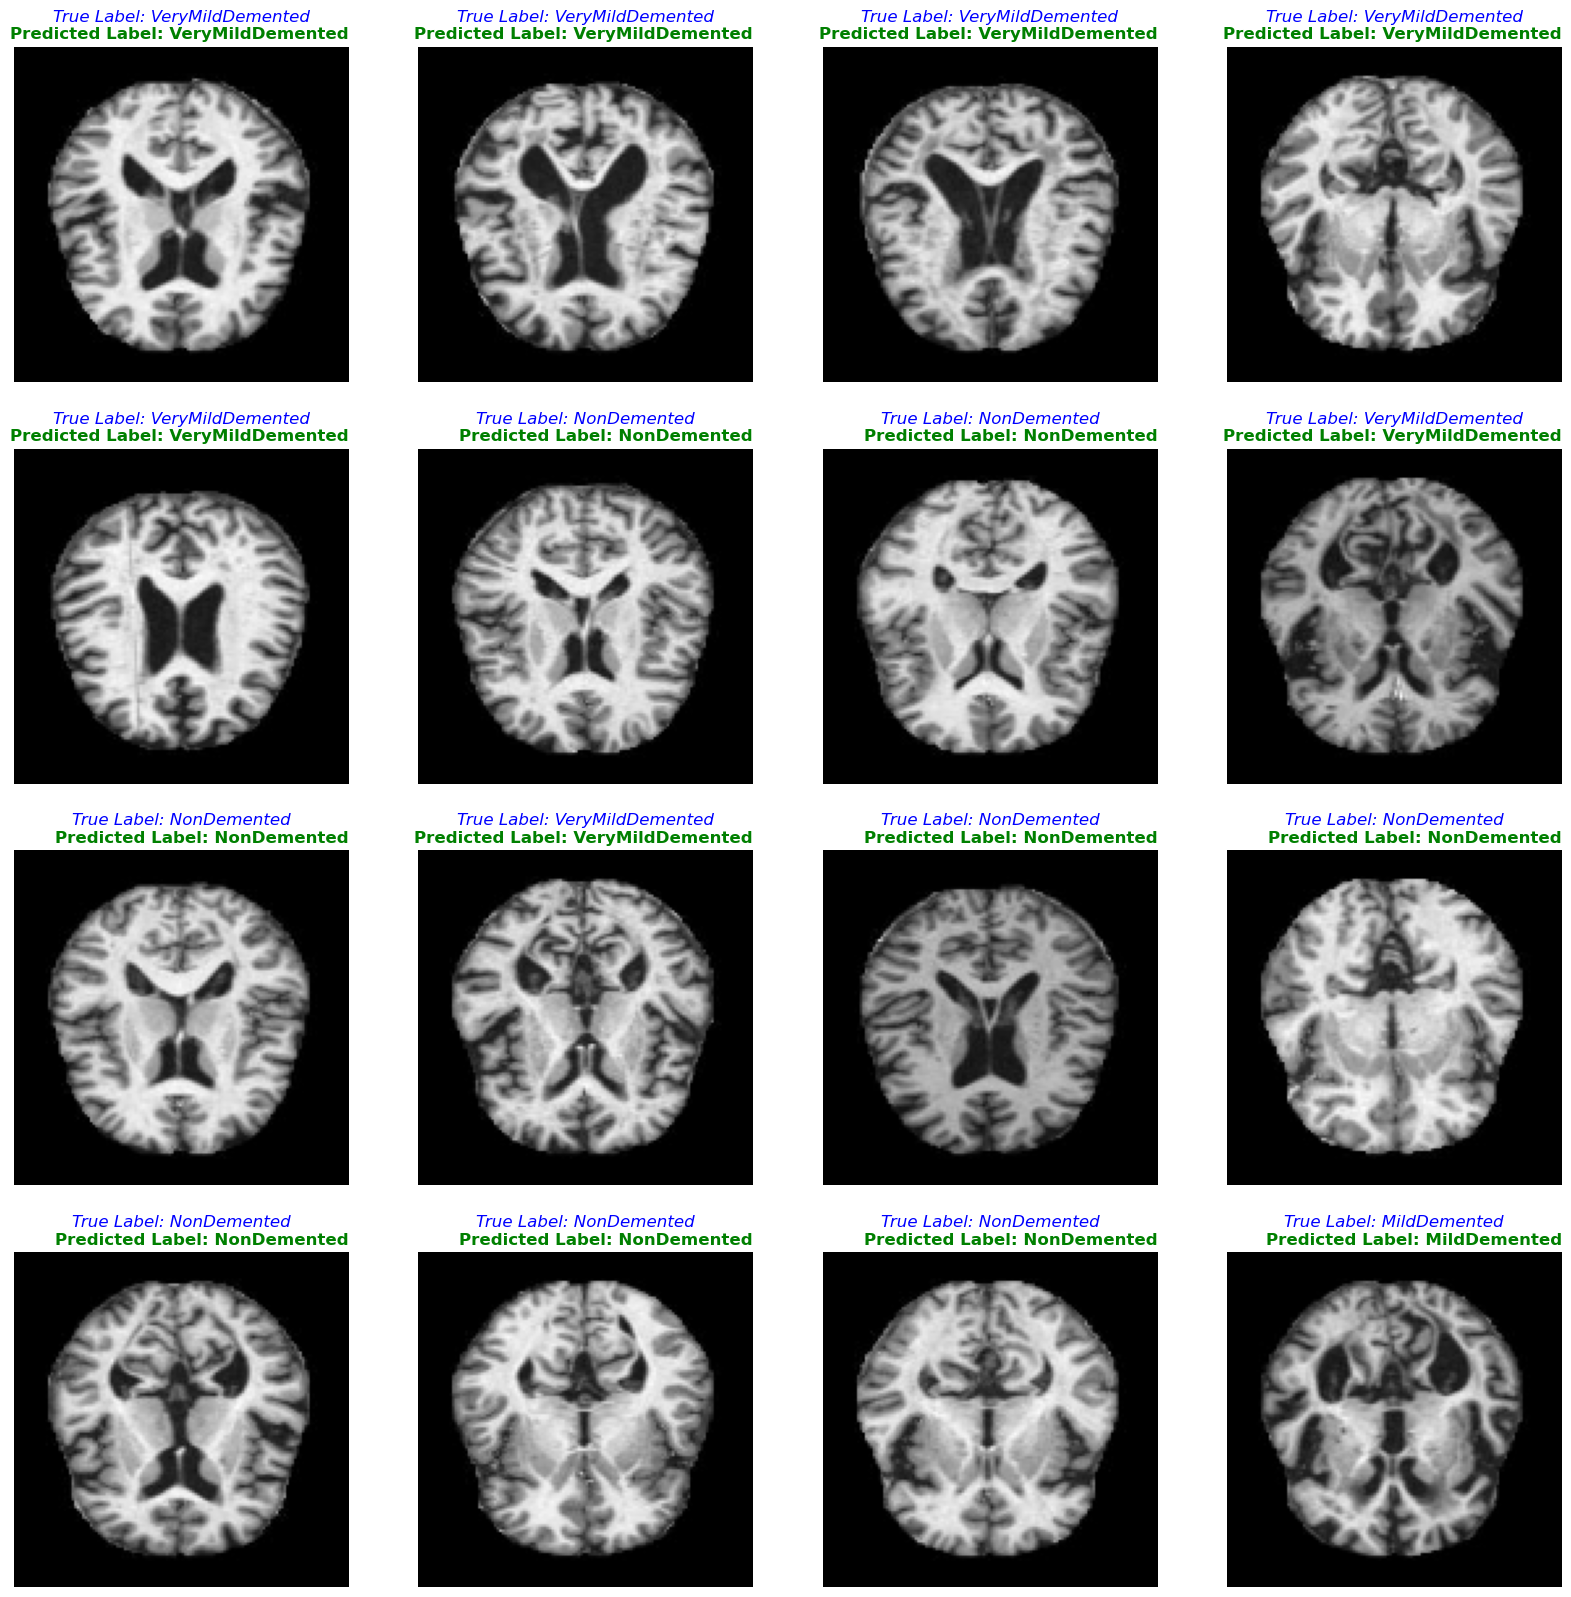

In [211]:
plt.figure(figsize=(20, 20))
for image, label in X_validation.take(1): 
    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        img = image[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        predicted_class = np.argmax(modelEn.predict(img))
        plt.axis('off')
        plt.title("True Label: " + class_names[label[i]]+'\n', fontsize=12, style='italic', color='blue', loc='center')
        plt.title("Predicted Label: " + class_names[predicted_class], fontsize=12, fontweight='bold', color='green', loc='right')
        plt.imshow(image[i].numpy().astype("uint8"))

In [6]:
filename = 'models/model_' + 'main' + '.h5'
modelEn.save(filename)
print('>Saved %s' % filename)

NameError: name 'modelEn' is not defined

In [12]:
from keras.models import load_model
filename = 'models/model_' + 'main' + '.h5'
modelf = load_model(filename)

In [14]:
pip install git+https://github.com/paulgavrikov/visualkeras

^C
Note: you may need to restart the kernel to use updated packages.


In [20]:
import visualkeras
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 16)
visualkeras.layered_view(models[0], legend=True ,, to_file='output1.png',font=font).show() # write and show

In [19]:
visualkeras.layered_view(models[1], legend=True , to_file='output1.png',font=font).show()

In [1]:
pip install conx -U --user

     -------------------------------------- 109.8/109.8 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 43.0/43.0 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 67.1/67.1 kB 1.2 MB/s eta 0:00:00
     -------------------------------------- 69.9/69.9 kB 961.5 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2936 sha256=7239494a956efc11b8308f5c3b16da7004971f0476cce8718ec57a9f073d267a
  Stored in directory: c:\users\aasgi\appdata\local\pip\cache\wheels\f8\e0\3d\9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
  Created wheel for cairocffi: filename=cairocffi-1.4.0-py3-none-any.whl size=88790 sha256=a7c207b9d1a7355670a2da30fcefc065e5597743bca7a63e7eef307c18fed56f
  Stored in directory: c:\users\aasg

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
jupyter nbextension enable --py widgetsnbextension

SyntaxError: invalid syntax (2269694994.py, line 1)

In [8]:
modelf

In [9]:
filename = 'models/model_main' + str(1) + '.h5'
print('>Saved %s' % filename)
modelf.save(filename)

>Saved models/model_main1.h5
